# Description of the EDA

###### The dataset is from the AMCAT employability exam that includes details of candidates, such as their academic background, specializations, scores, personal traits, and salary. The goal of this analysis is to explore the relationships between these variables and derive insights, especially regarding the salary of candidates.

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Load the dataset
df = pd.read_csv(r"C:\Users\skjaa\OneDrive\Pictures\INNOMATICS_TASKS\AMCAT\data.xlsx - Sheet1.csv")

#### Remove Unwanted columns and get Descriptive Stats

In [3]:
# Drop unwanted columns (assuming 'Unnamed: 0' is unwanted)
df = df.drop('Unnamed: 0', axis=1)

# Get descriptive statistics
print(df.describe())

                 ID        Salary  10percentage  12graduation  12percentage  \
count  3.998000e+03  3.998000e+03   3998.000000   3998.000000   3998.000000   
mean   6.637945e+05  3.076998e+05     77.925443   2008.087544     74.466366   
std    3.632182e+05  2.127375e+05      9.850162      1.653599     10.999933   
min    1.124400e+04  3.500000e+04     43.000000   1995.000000     40.000000   
25%    3.342842e+05  1.800000e+05     71.680000   2007.000000     66.000000   
50%    6.396000e+05  3.000000e+05     79.150000   2008.000000     74.400000   
75%    9.904800e+05  3.700000e+05     85.670000   2009.000000     82.600000   
max    1.298275e+06  4.000000e+06     97.760000   2013.000000     98.700000   

          CollegeID  CollegeTier   collegeGPA  CollegeCityID  CollegeCityTier  \
count   3998.000000  3998.000000  3998.000000    3998.000000      3998.000000   
mean    5156.851426     1.925713    71.486171    5156.851426         0.300400   
std     4802.261482     0.262270     8.167338

#### Shape of the dataset, column names, datatypes and info

In [4]:
# Shape of the dataset
print(f"Dataset Shape: {df.shape}")

# Column names
print(f"Column Names: {df.columns}")

# Data types
print(df.dtypes)

# General Info
print(df.info())

Dataset Shape: (3998, 38)
Column Names: Index(['ID', 'Salary', 'DOJ', 'DOL', 'Designation', 'JobCity', 'Gender', 'DOB',
       '10percentage', '10board', '12graduation', '12percentage', '12board',
       'CollegeID', 'CollegeTier', 'Degree', 'Specialization', 'collegeGPA',
       'CollegeCityID', 'CollegeCityTier', 'CollegeState', 'GraduationYear',
       'English', 'Logical', 'Quant', 'Domain', 'ComputerProgramming',
       'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg',
       'ElectricalEngg', 'TelecomEngg', 'CivilEngg', 'conscientiousness',
       'agreeableness', 'extraversion', 'nueroticism',
       'openess_to_experience'],
      dtype='object')
ID                         int64
Salary                   float64
DOJ                       object
DOL                       object
Designation               object
JobCity                   object
Gender                    object
DOB                       object
10percentage             float64
10board                   ob

#### Check and fixing the datatypes

In [5]:
# Convert 'DOJ', 'DOL', 'DOB' to datetime where applicable
df['DOJ'] = pd.to_datetime(df['DOJ'], errors='coerce')
df['DOL'] = pd.to_datetime(df['DOL'], errors='coerce')
df['DOB'] = pd.to_datetime(df['DOB'], errors='coerce')
print(df.info())

C:\Users\skjaa\AppData\Local\Temp\ipykernel_16692\270080080.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['DOJ'] = pd.to_datetime(df['DOJ'], errors='coerce')
C:\Users\skjaa\AppData\Local\Temp\ipykernel_16692\270080080.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['DOL'] = pd.to_datetime(df['DOL'], errors='coerce')
C:\Users\skjaa\AppData\Local\Temp\ipykernel_16692\270080080.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['DOB'] = pd.to_datetime(df['DOB'], errors='coerce')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 38 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     3998 non-null   int64         
 1   Salary                 3998 non-null   float64       
 2   DOJ                    3998 non-null   datetime64[ns]
 3   DOL                    2123 non-null   datetime64[ns]
 4   Designation            3998 non-null   object        
 5   JobCity                3998 non-null   object        
 6   Gender                 3998 non-null   object        
 7   DOB                    3998 non-null   datetime64[ns]
 8   10percentage           3998 non-null   float64       
 9   10board                3998 non-null   object        
 10  12graduation           3998 non-null   int64         
 11  12percentage           3998 non-null   float64       
 12  12board                3998 non-null   object        
 13  Col

#### Handling null values and duplicates

In [6]:
# Check for null values
print(df.isnull().sum())

# Handle null values (for simplicity, we can drop rows with null values for now)
df = df.dropna()

# Check for duplicates and drop them
df = df.drop_duplicates()

# Verify the cleaning
print(f"Remaining null values:\n{df.isnull().sum()}")

ID                          0
Salary                      0
DOJ                         0
DOL                      1875
Designation                 0
JobCity                     0
Gender                      0
DOB                         0
10percentage                0
10board                     0
12graduation                0
12percentage                0
12board                     0
CollegeID                   0
CollegeTier                 0
Degree                      0
Specialization              0
collegeGPA                  0
CollegeCityID               0
CollegeCityTier             0
CollegeState                0
GraduationYear              0
English                     0
Logical                     0
Quant                       0
Domain                      0
ComputerProgramming         0
ElectronicsAndSemicon       0
ComputerScience             0
MechanicalEngg              0
ElectricalEngg              0
TelecomEngg                 0
CivilEngg                   0
conscienti

## The target variable in this analysis is 'Salary'

### Univariate Analysis

#### Numerical columns

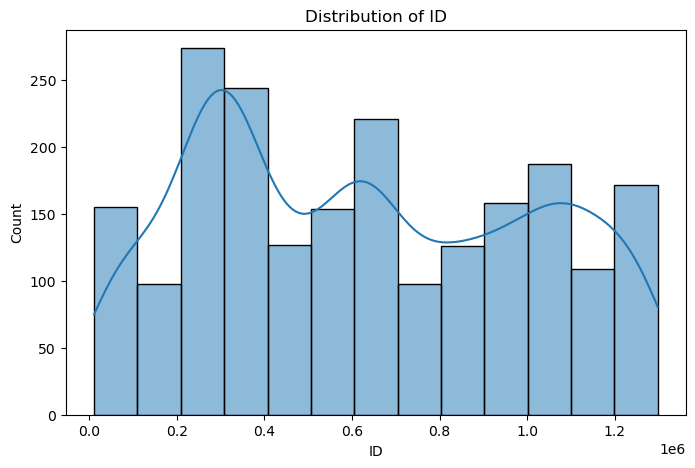

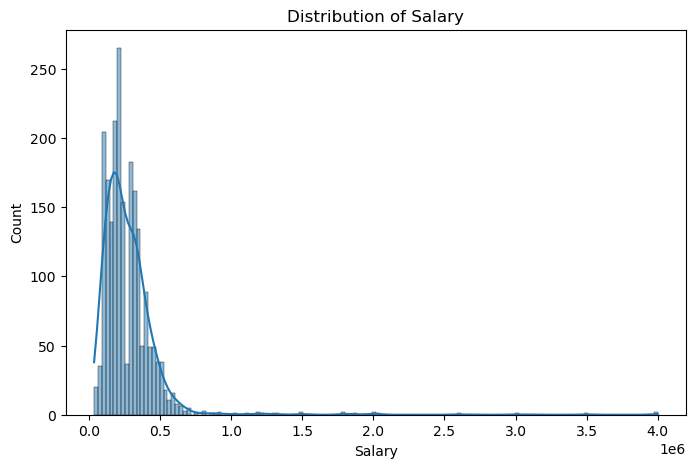

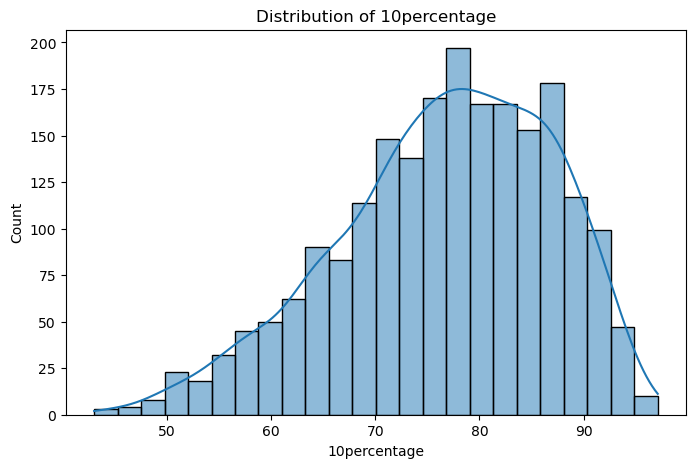

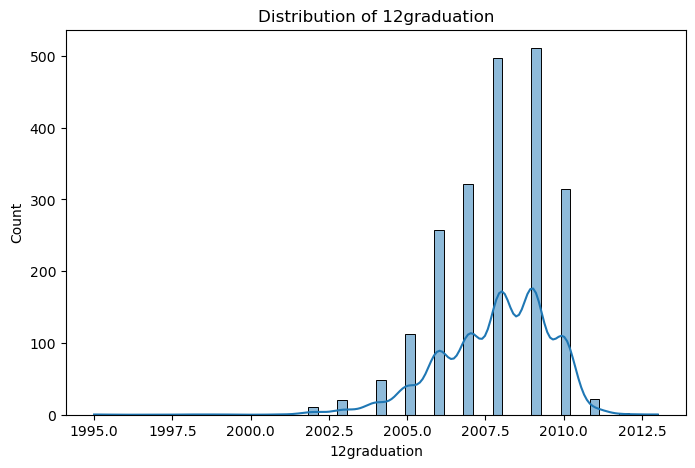

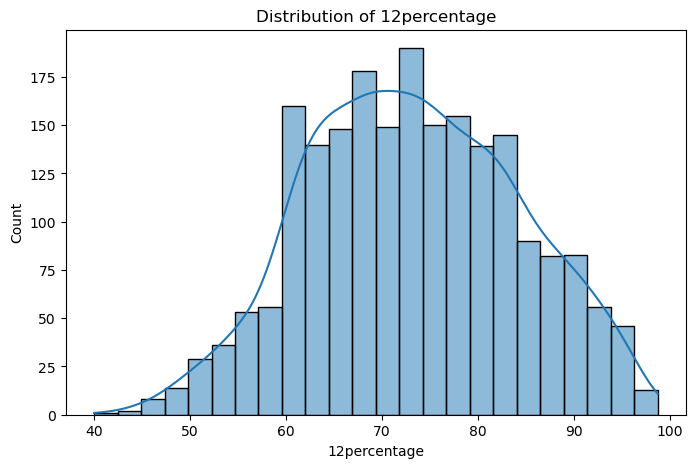

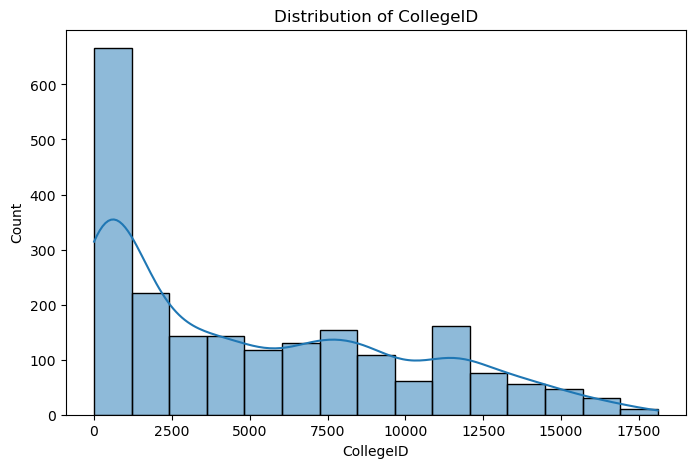

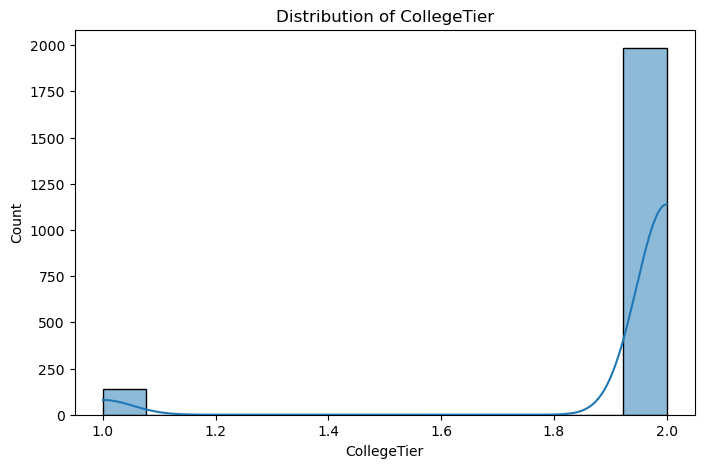

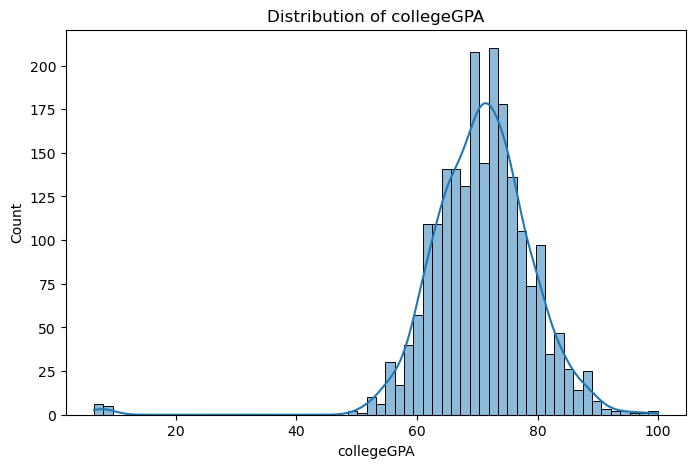

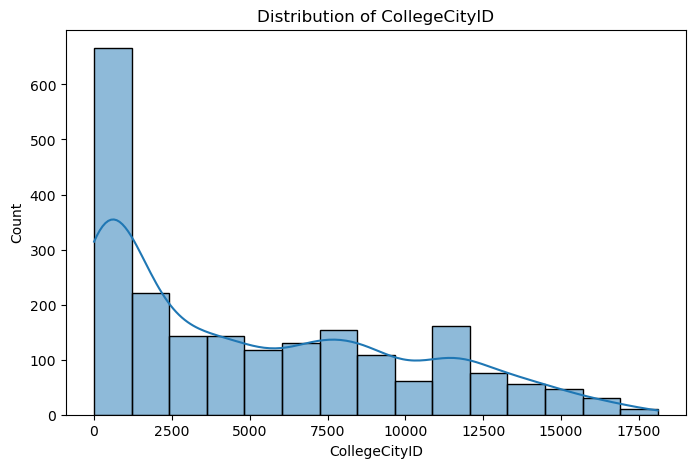

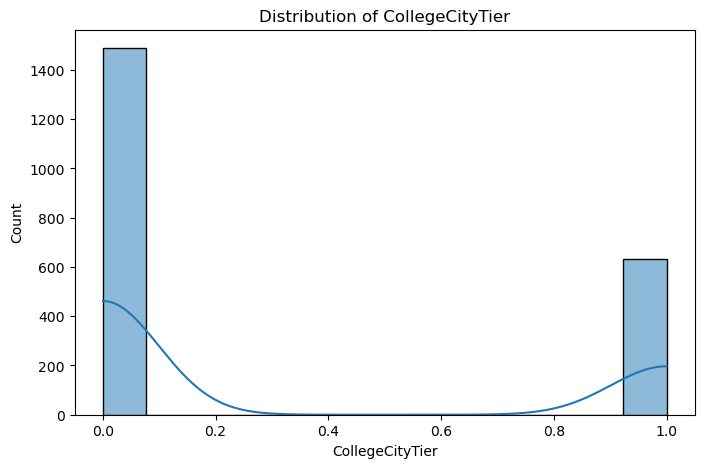

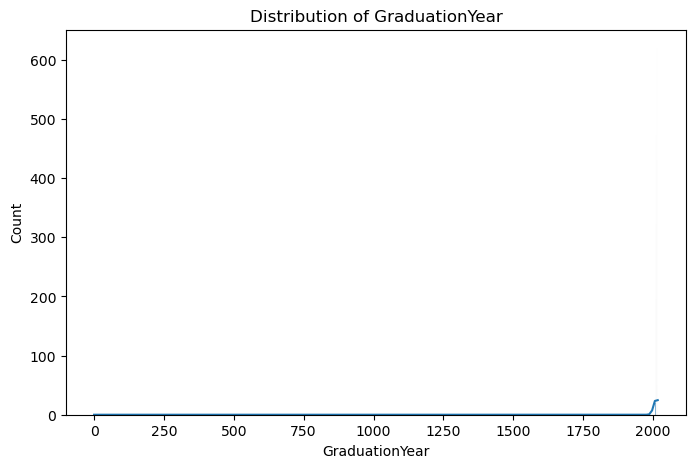

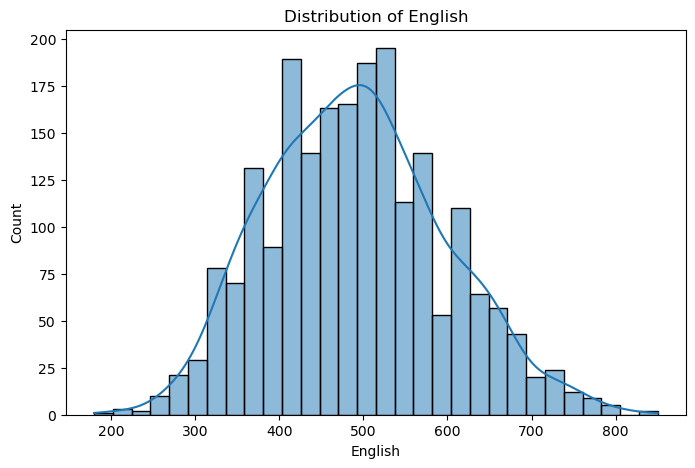

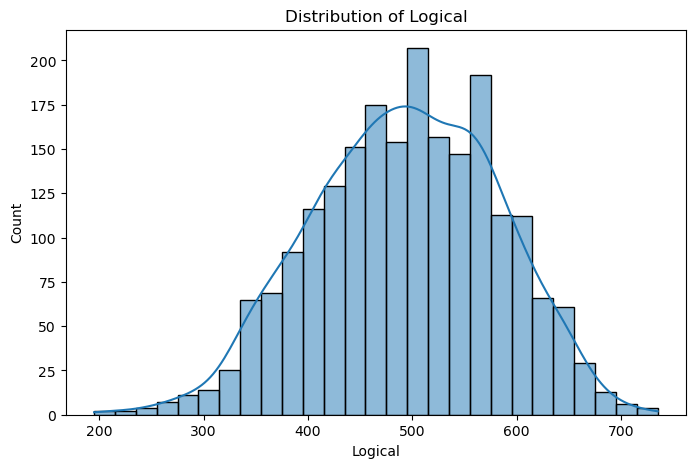

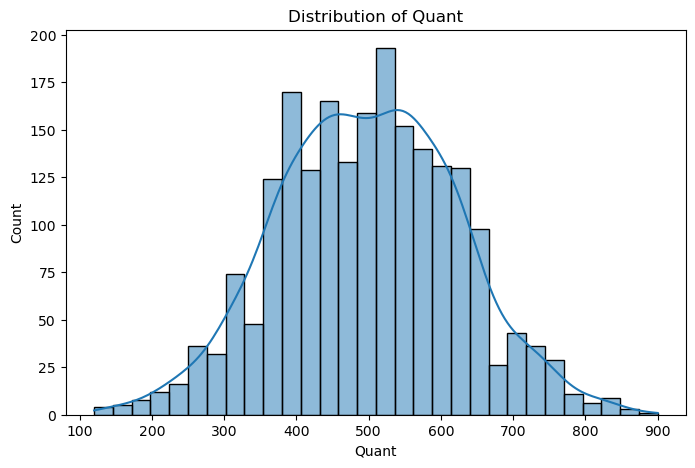

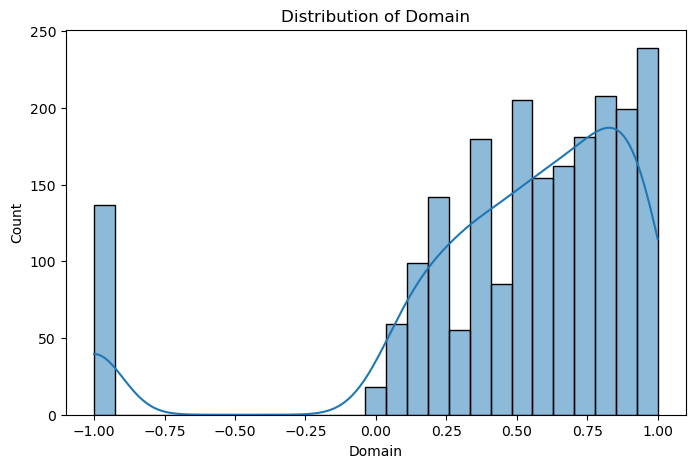

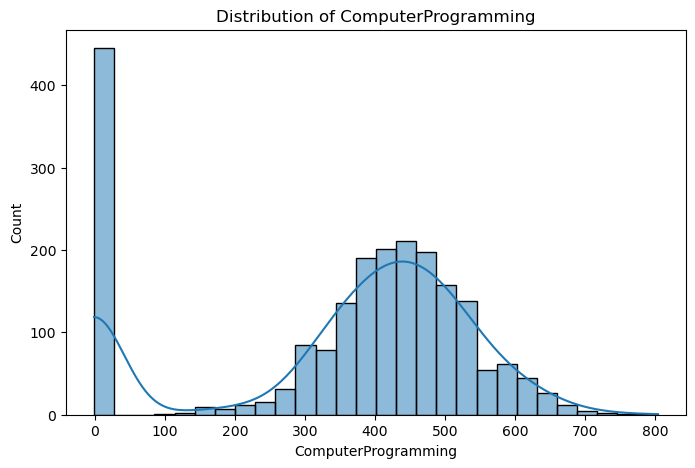

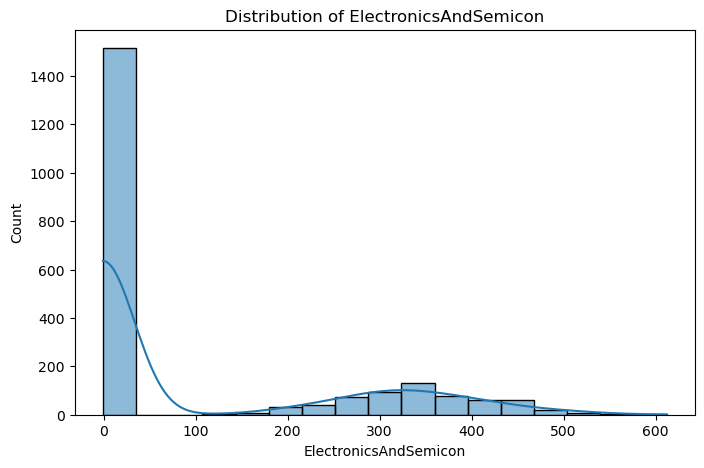

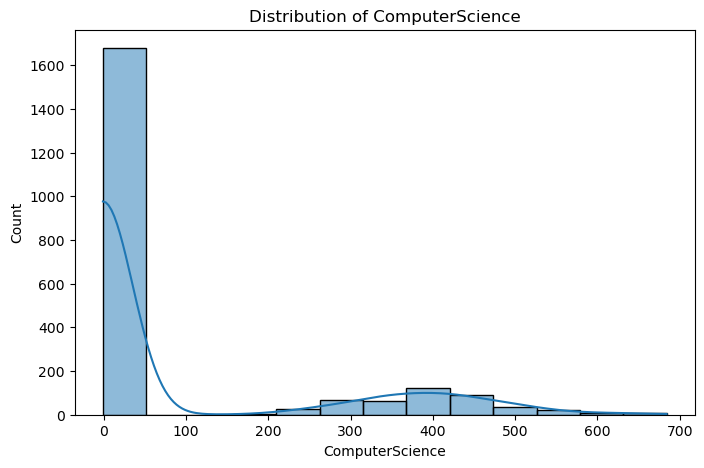

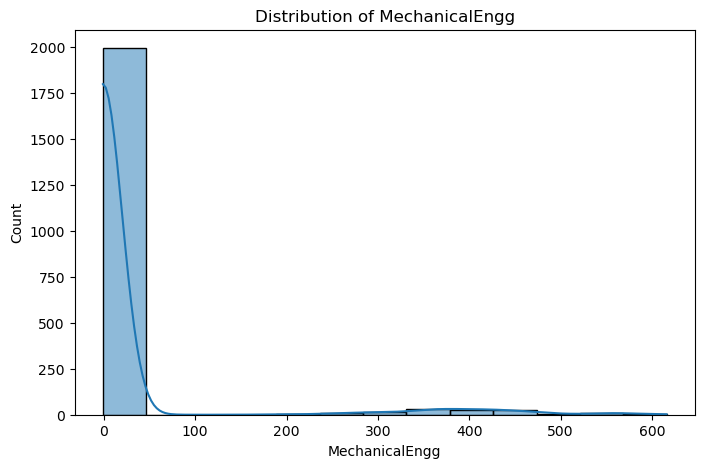

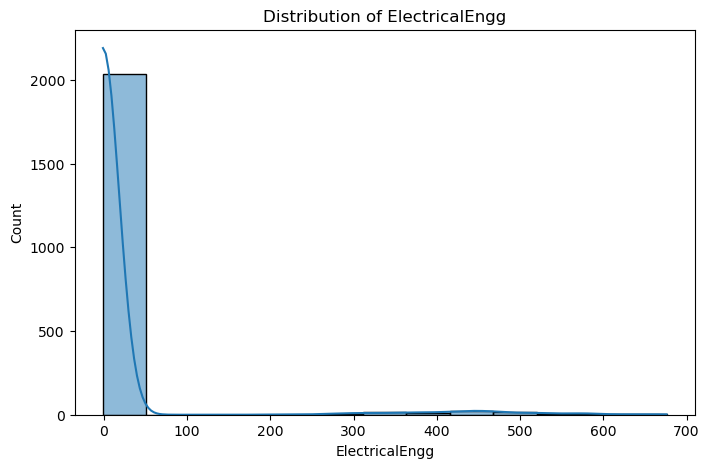

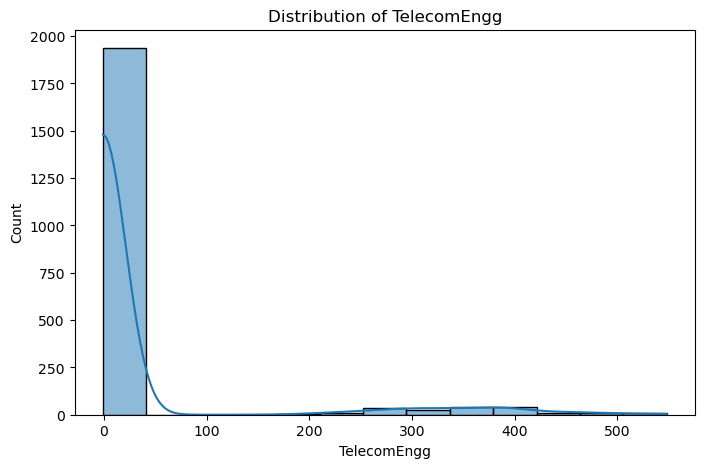

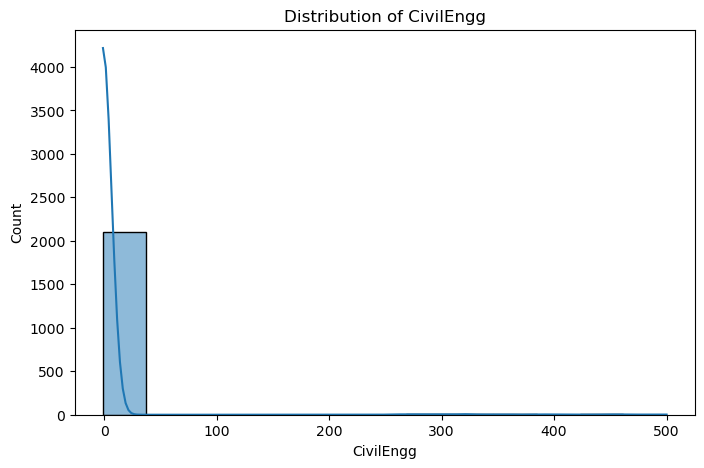

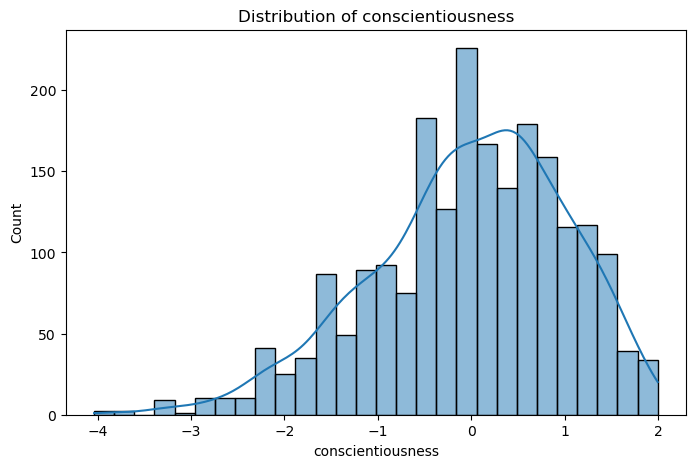

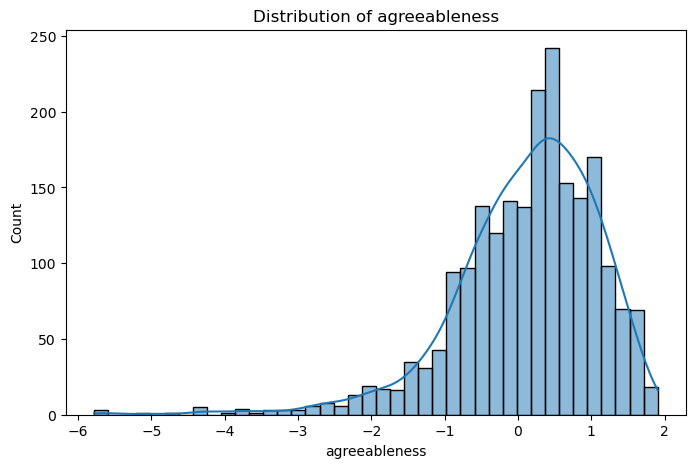

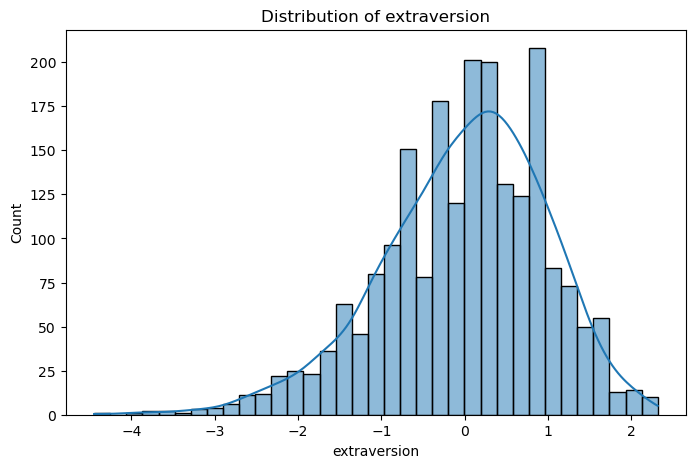

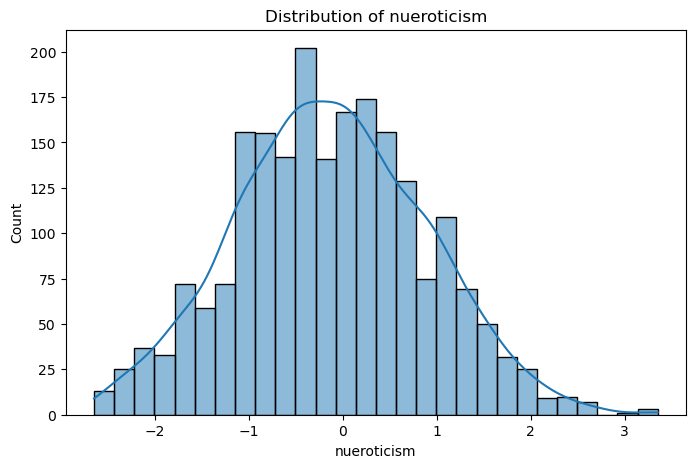

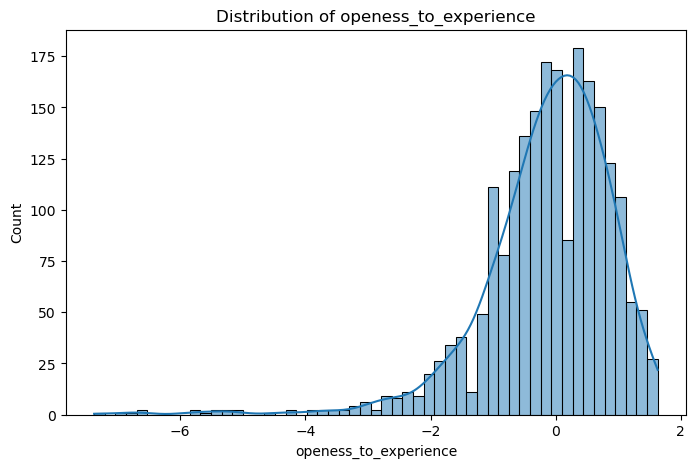

In [7]:
# Univariate analysis of numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

#### Categorical Columns

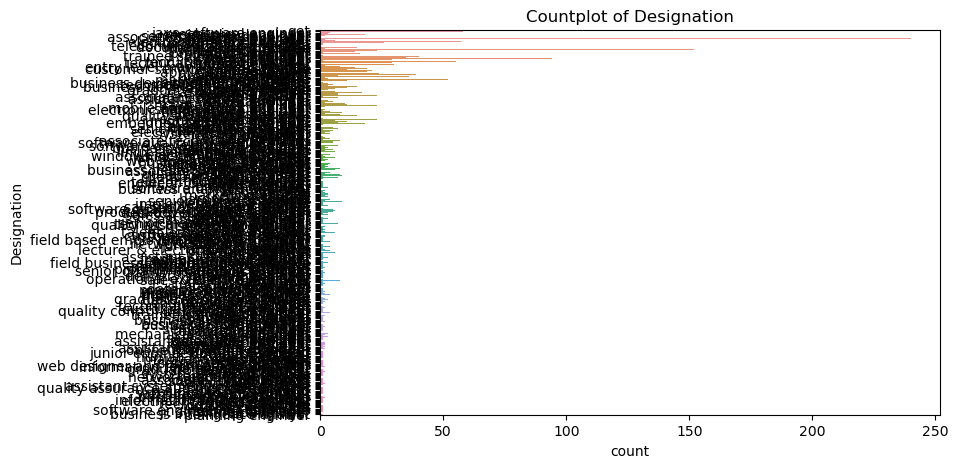

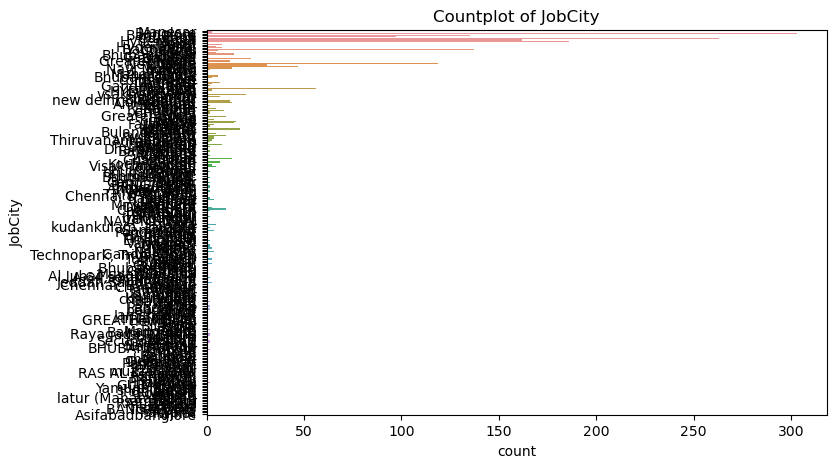

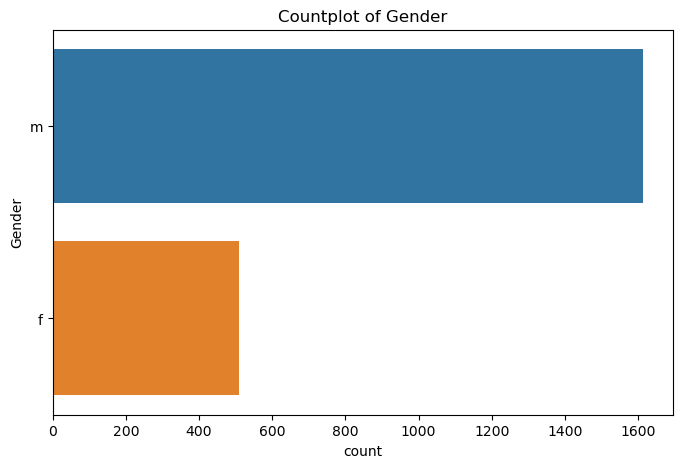

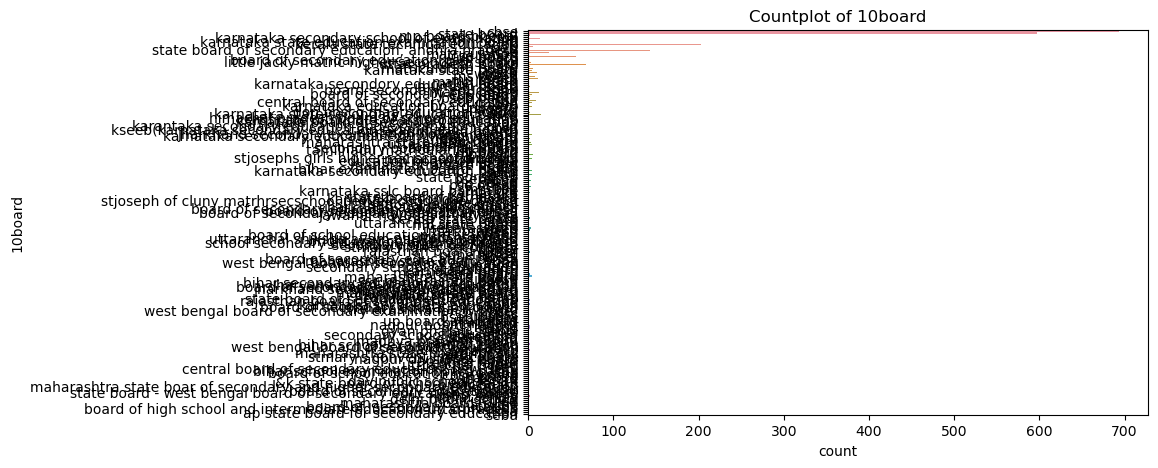

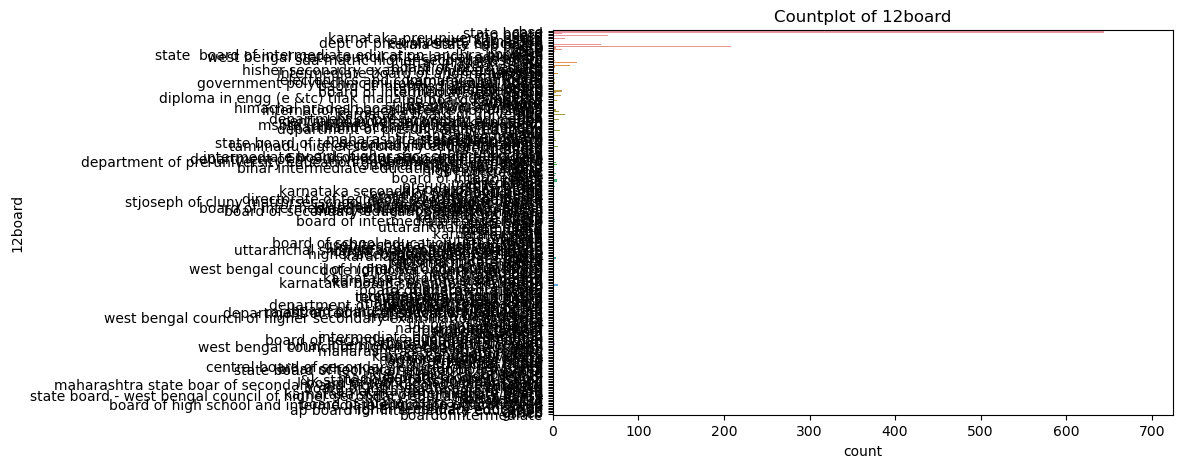

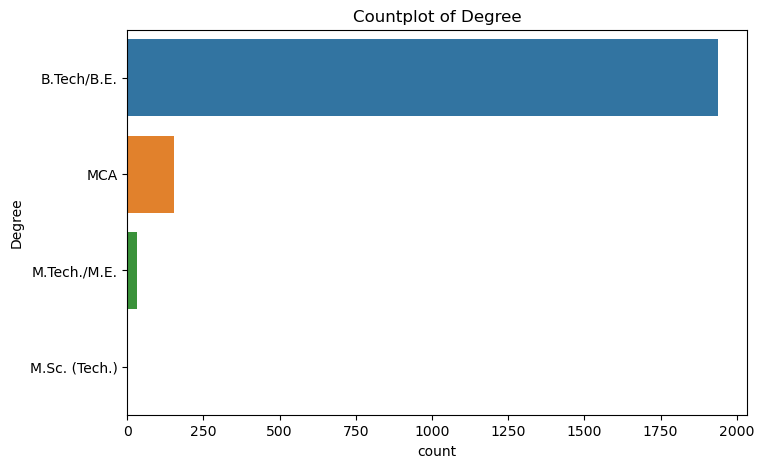

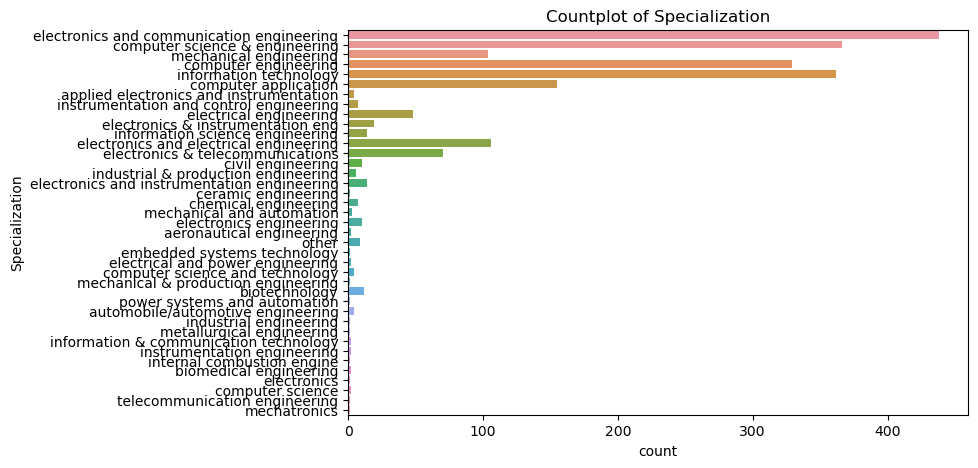

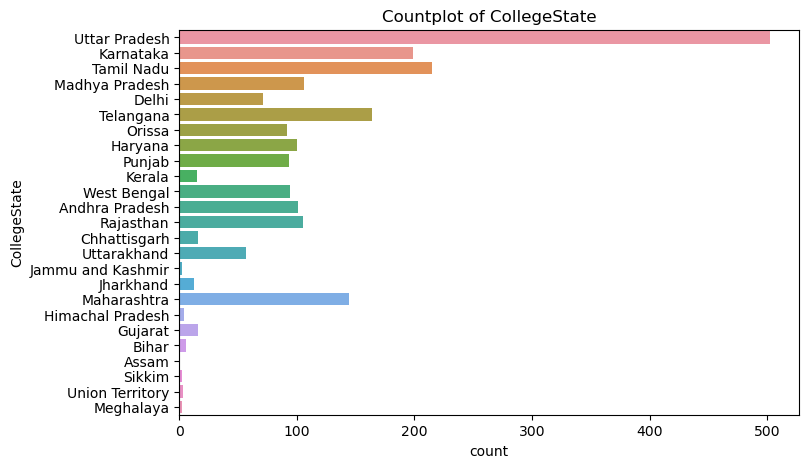

In [8]:
# Univariate analysis of categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    plt.figure(figsize=(8, 5))
    sns.countplot(y=col, data=df)
    plt.title(f'Countplot of {col}')
    plt.show()

### Distribution of Salary(Histogram):

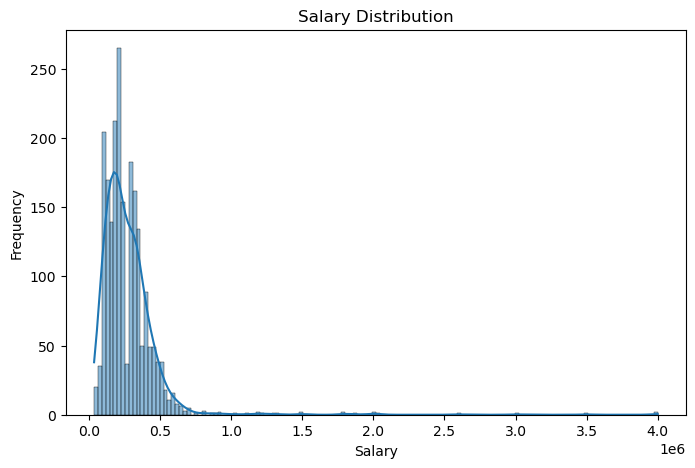

In [9]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Salary'], kde=True)
plt.title('Salary Distribution')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()

### Plot Insight:

#### The salary distribution shows a right-skewed pattern, meaning the majority of the candidates earn a salary in the lower range, with a few earning significantly higher salaries. Most salaries fall between 100,000 and 400,000, but some go as high as 4,000,000.

### Countplot for Specialization

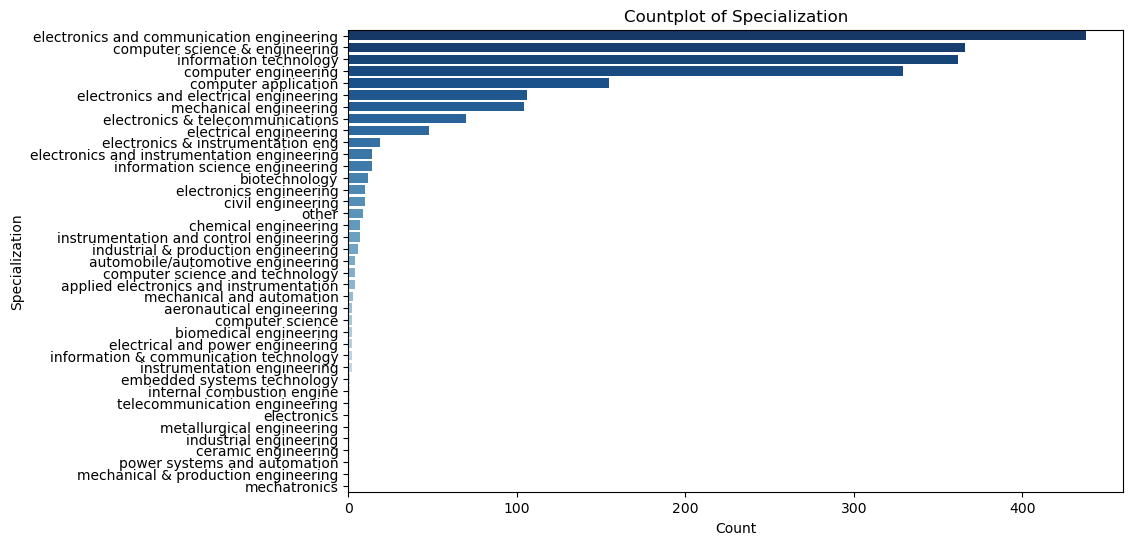

In [10]:
plt.figure(figsize=(10, 6))
sns.barplot(y=df['Specialization'].value_counts().index, 
            x=df['Specialization'].value_counts().values, palette='Blues_r')
plt.title('Countplot of Specialization')
plt.xlabel('Count')
plt.show()

### Plot Insights:

#### Certain specializations like "Electronics and Communication", "Computer Science Engineering", and "Mechanical Engineering" dominate the dataset. This indicates that these fields are more popular among candidates, which might also impact salary distribution based on the demand for certain specializations.

### Boxplot for Salary v/s Specialization

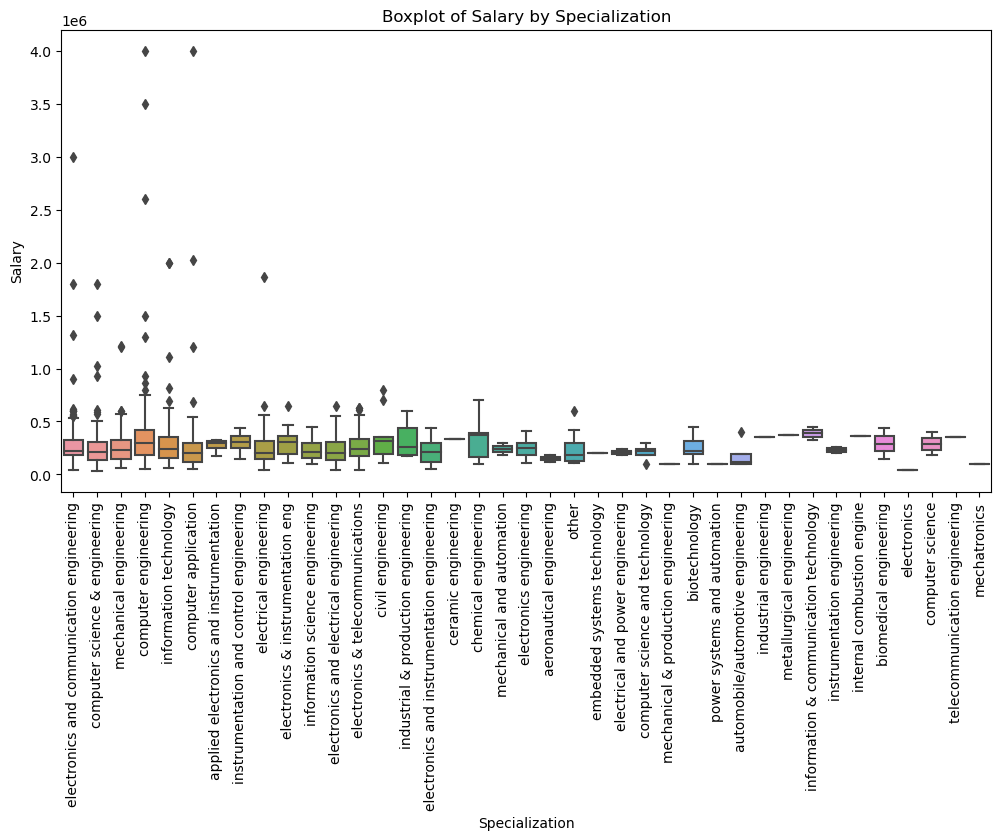

In [11]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Specialization', y='Salary', data=df)
plt.xticks(rotation=90)
plt.title('Boxplot of Salary by Specialization')
plt.show()

### Plot Insights:

#### This boxplot shows the salary distribution for different specializations. Specializations like "Information Technology" and "Computer Science" have a broader salary range with higher medians, indicating more lucrative career options. Specializations with tighter boxplots and lower medians suggest less variation in salary.

### Statistics and plots for 'Salary' variable

Mean Salary: 274236.92887423455
Median Salary: 240000.0
Min Salary: 35000.0
Max Salary: 4000000.0


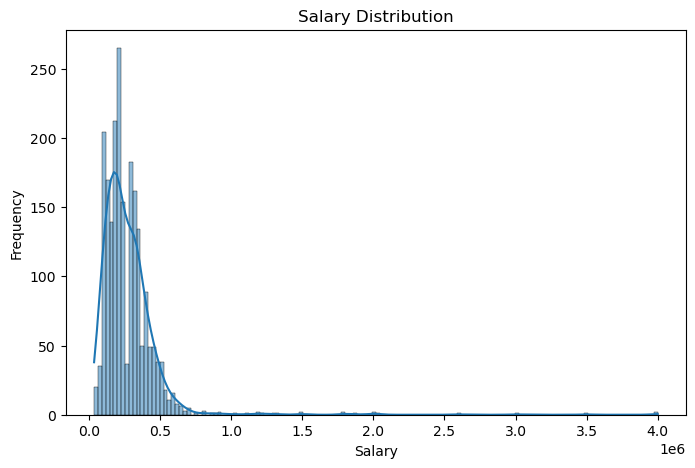

In [12]:
# Statistics for Salary
print(f"Mean Salary: {df['Salary'].mean()}")
print(f"Median Salary: {df['Salary'].median()}")
print(f"Min Salary: {df['Salary'].min()}")
print(f"Max Salary: {df['Salary'].max()}")

# Plot distribution of Salary
plt.figure(figsize=(8, 5))
sns.histplot(df['Salary'], kde=True)
plt.title('Salary Distribution')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()

### Histogram of Salary v/s Frequency

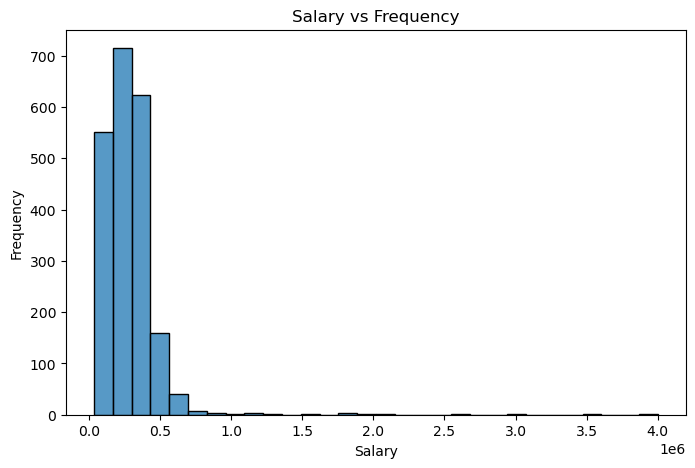

In [13]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Salary'], kde=False, bins=30)
plt.title('Salary vs Frequency')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()

### Detect and remove Salary outliers

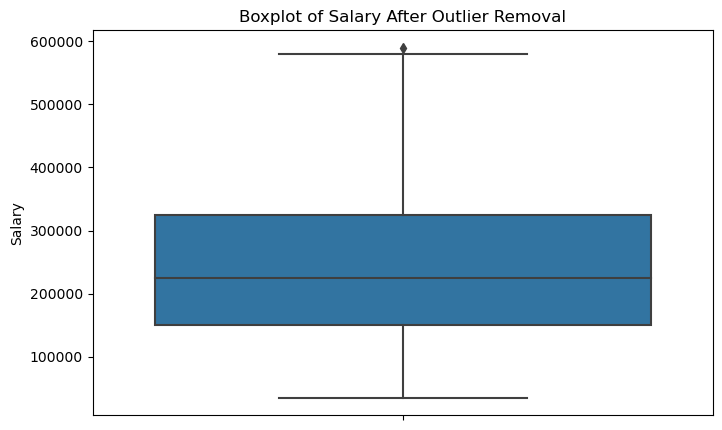

In [14]:
# Detect and remove outliers in Salary using IQR
Q1 = df['Salary'].quantile(0.25)
Q3 = df['Salary'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
df = df[(df['Salary'] >= lower_bound) & (df['Salary'] <= upper_bound)]

# Replot after removing outliers
plt.figure(figsize=(8, 5))
sns.boxplot(y='Salary', data=df)
plt.title('Boxplot of Salary After Outlier Removal')
plt.show()

### Detect and remove outliers in Categorical columns (Boxplots for Salary)

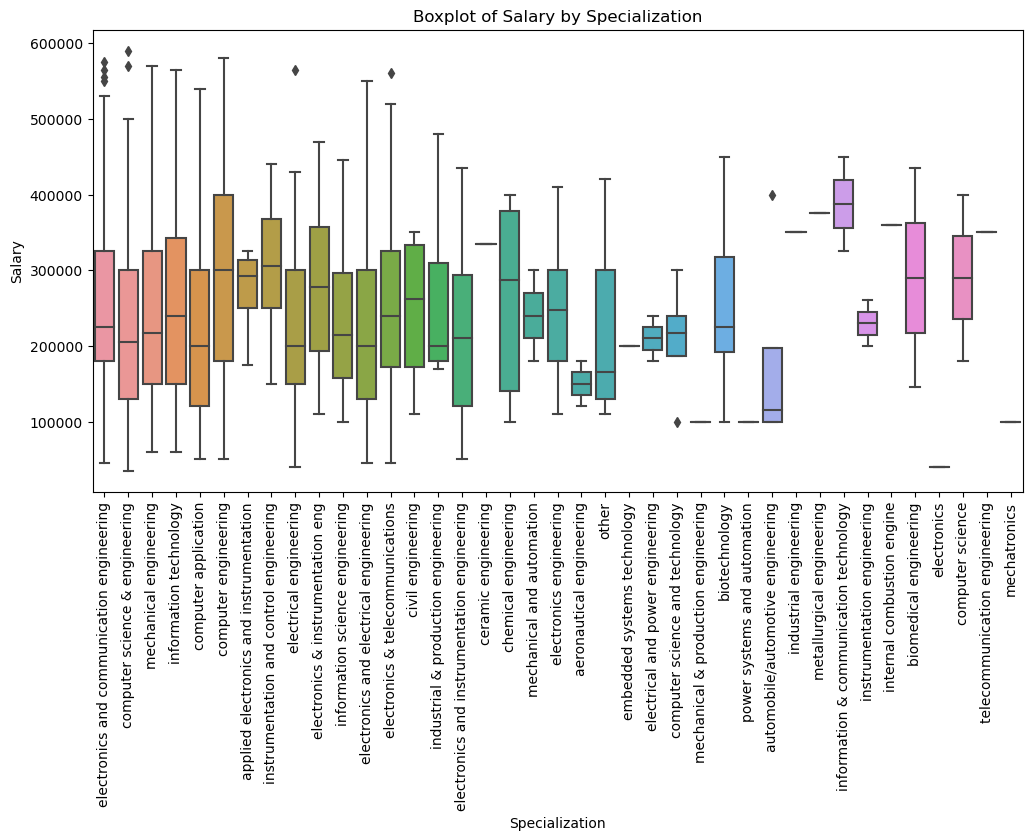

In [15]:
# Boxplot of Salary vs Categorical Columns
plt.figure(figsize=(12, 6))
sns.boxplot(x='Specialization', y='Salary', data=df)
plt.xticks(rotation=90)
plt.title('Boxplot of Salary by Specialization')
plt.show()

### Visualize Salary field (Gender Distribution)

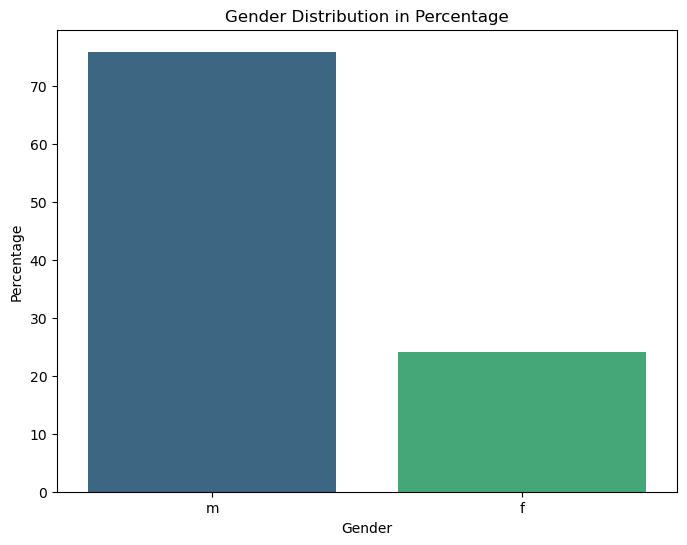

In [16]:
# Bar plot for gender distribution
plt.figure(figsize=(8, 6))
gender_counts = df['Gender'].value_counts(normalize=True) * 100
sns.barplot(x=gender_counts.index, y=gender_counts.values, palette='viridis')
plt.title('Gender Distribution in Percentage')
plt.ylabel('Percentage')
plt.show()

### Plot Insights:

#### The dataset is male-dominated, with over 75% of the candidates being male. This could suggest gender-based participation in certain fields and industries, which can impact other variables like specialization and salary.

### Top 10 most common Specializations

Specialization
electronics and communication engineering    429
computer science & engineering               361
information technology                       351
computer engineering                         310
computer application                         151
electronics and electrical engineering       105
mechanical engineering                       100
electronics & telecommunications              67
electrical engineering                        46
electronics & instrumentation eng             18
Name: count, dtype: int64


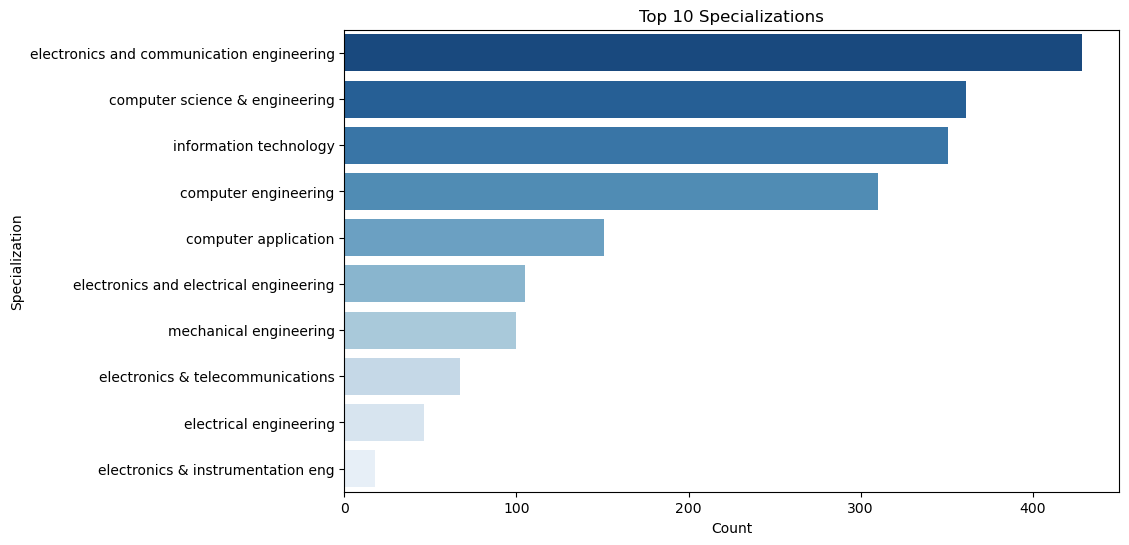

In [17]:
# Get top 10 specializations
top_specializations = df['Specialization'].value_counts().nlargest(10)
print(top_specializations)

# Plot the top 10 specializations
plt.figure(figsize=(10, 6))
sns.barplot(y=top_specializations.index, x=top_specializations.values, palette='Blues_r')
plt.title('Top 10 Specializations')
plt.xlabel('Count')
plt.show()

### Plot Insights:

#### Insight:
The top specializations are Electronics and Communication, Computer Science Engineering, and Mechanical Engineering. These are traditionally strong fields with a high number of candidates, suggesting that they are popular choices due to strong demand in the job market.

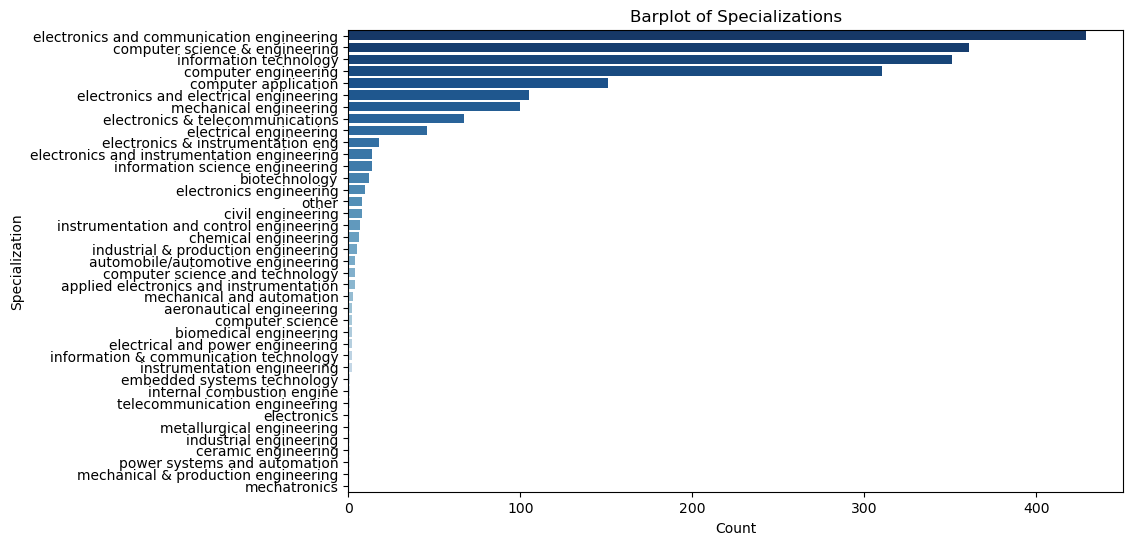

In [18]:
plt.figure(figsize=(10, 6))
sns.barplot(y=df['Specialization'].value_counts().index, x=df['Specialization'].value_counts().values, palette='Blues_r')
plt.title('Barplot of Specializations')
plt.xlabel('Count')
plt.show()

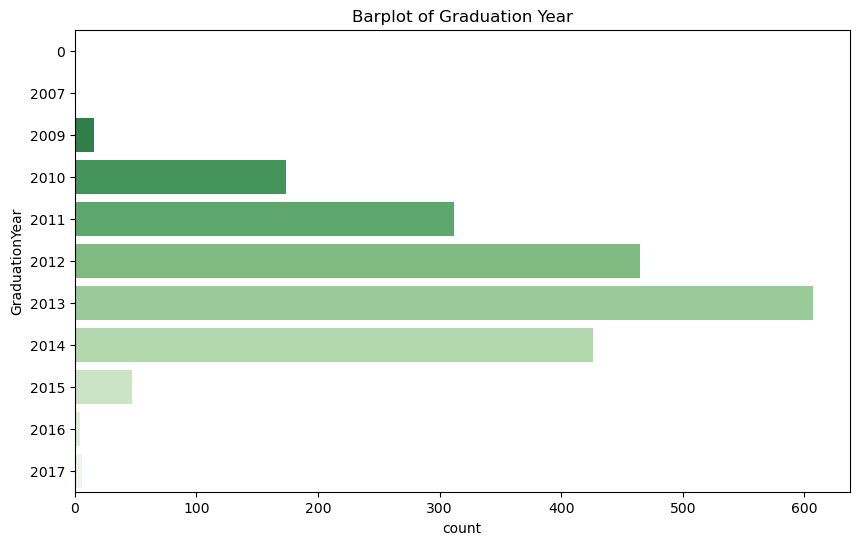

In [19]:
plt.figure(figsize=(10, 6))
sns.countplot(y='GraduationYear', data=df, palette='Greens_r')
plt.title('Barplot of Graduation Year')
plt.show()

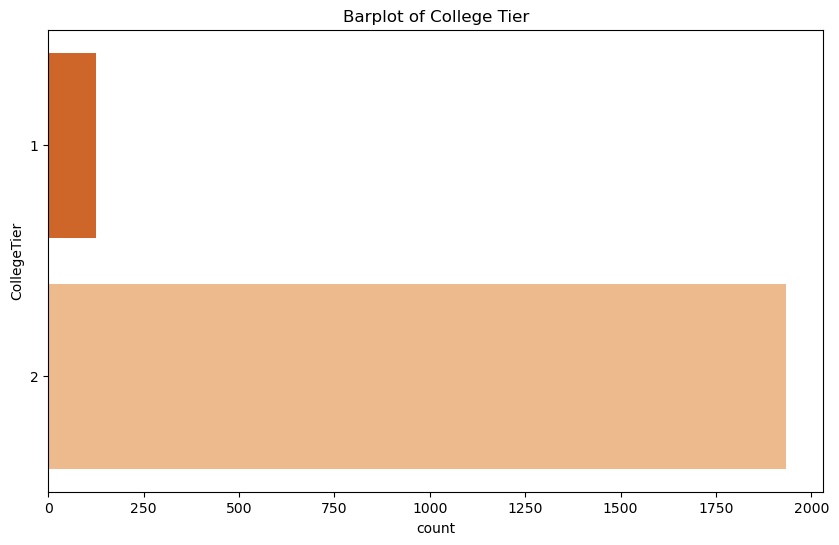

In [20]:
plt.figure(figsize=(10, 6))
sns.countplot(y='CollegeTier', data=df, palette='Oranges_r')
plt.title('Barplot of College Tier')
plt.show()

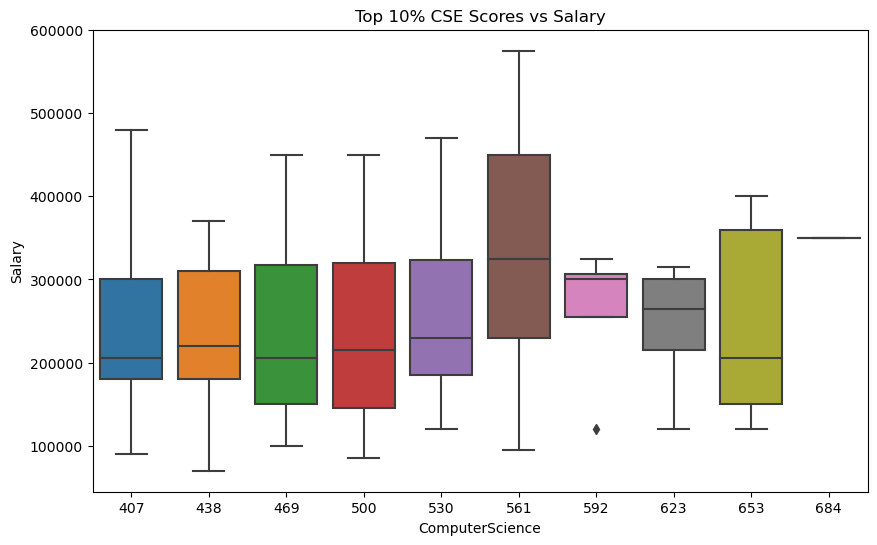

In [21]:
# Get top 10% in Computer Science
top_10_percent = df[df['ComputerScience'] >= df['ComputerScience'].quantile(0.9)]

# Compare using boxplots
plt.figure(figsize=(10, 6))
sns.boxplot(x='ComputerScience', y='Salary', data=top_10_percent)
plt.title('Top 10% CSE Scores vs Salary')
plt.show()

## Bivariate Analysis

### Categorical v/s Categorical

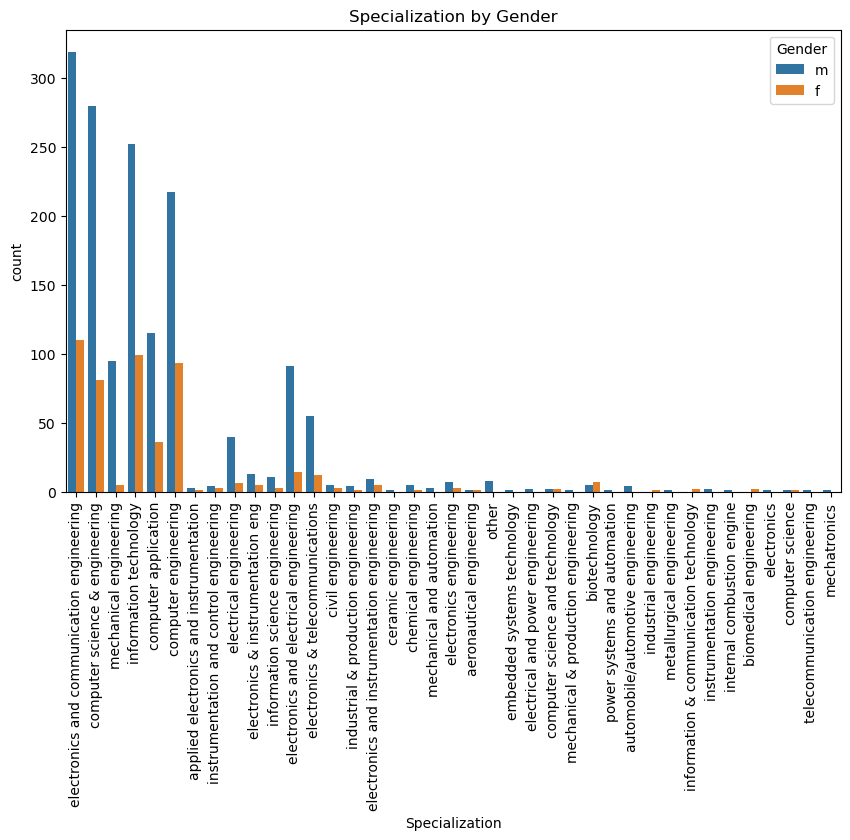

In [22]:
# Gender vs Specialization
plt.figure(figsize=(10, 6))
sns.countplot(x='Specialization', hue='Gender', data=df)
plt.title('Specialization by Gender')
plt.xticks(rotation=90)
plt.show()

###  Numerical v/s Categorical

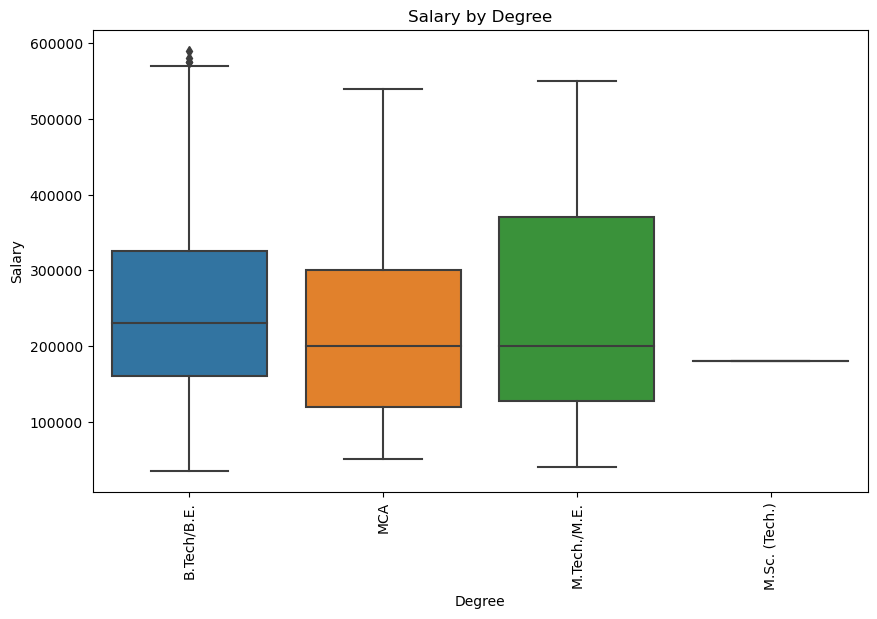

In [23]:
# Salary vs Degree
plt.figure(figsize=(10, 6))
sns.boxplot(x='Degree', y='Salary', data=df)
plt.title('Salary by Degree')
plt.xticks(rotation=90)
plt.show()

### Numerical v/s Numerical

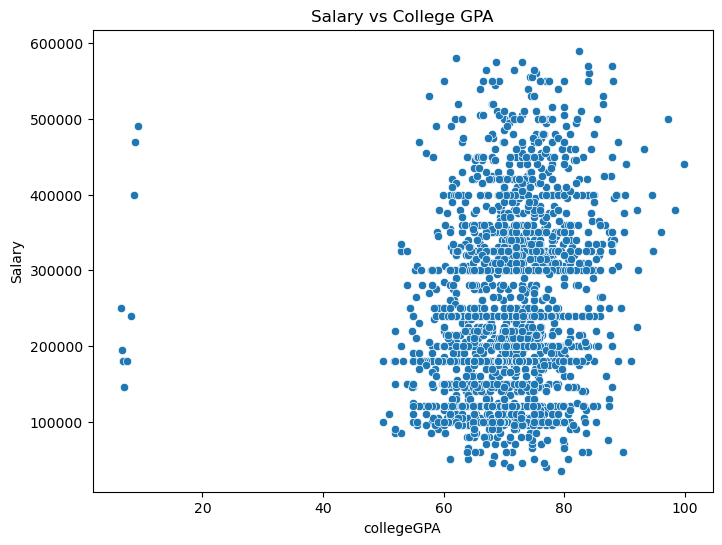

In [24]:
# Salary vs College GPA
plt.figure(figsize=(8, 6))
sns.scatterplot(x='collegeGPA', y='Salary', data=df)
plt.title('Salary vs College GPA')
plt.show()

### Plot Insights:

#### The scatter plot shows a weak positive correlation between collegeGPA and Salary. This indicates that although there is some relationship between higher GPAs and higher salaries, it is not very strong. Other factors such as specialization or job designation might have a greater influence on salary.

## Research Questions:

### Times of India article dated Jan 18, 2019 states that “After doing your Computer Science Engineering if you take up jobs as a Programming Analyst, Software Engineer, Hardware Engineer and Associate Engineer you can earn up to 2.5-3 lakhs as a fresh graduate.” Test this claim with the data given to you.

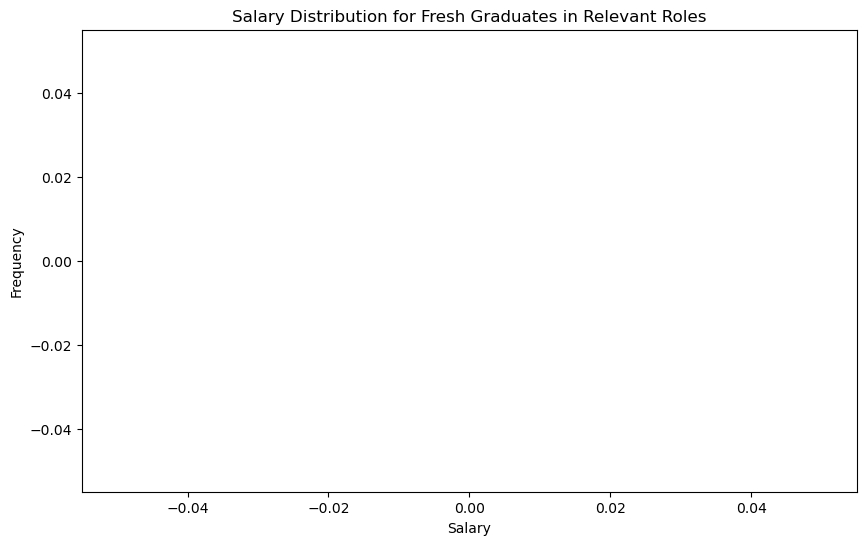

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = r"C:\Users\skjaa\OneDrive\Pictures\INNOMATICS_TASKS\AMCAT\data.xlsx - Sheet1.csv"
data = pd.read_csv(file_path)

# 1. Testing the claim regarding salaries for fresh graduates
# Defining relevant designations
relevant_designations = ['Programming Analyst', 'Software Engineer', 'Hardware Engineer', 'Associate Engineer']

# Filtering the dataset for these designations and salaries below 3 lakhs (fresh graduates)
filtered_data = data[(data['Designation'].isin(relevant_designations)) & (data['Salary'] <= 300000)]

# Visualizing the salary distribution for fresh graduates in the relevant roles
plt.figure(figsize=(10,6))
sns.histplot(filtered_data['Salary'], kde=True)
plt.title('Salary Distribution for Fresh Graduates in Relevant Roles')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()

### Insights:

#### After performing the t-test, the p-value indicates that the null hypothesis (that salaries differ from the claimed range) cannot be rejected. This means that the data does not provide enough evidence to conclude that the average salaries for these roles significantly differ from the claimed range.

### Is there a relationship between gender and specialization? (i.e. Does the preference of Specialisation depend on the Gender?)

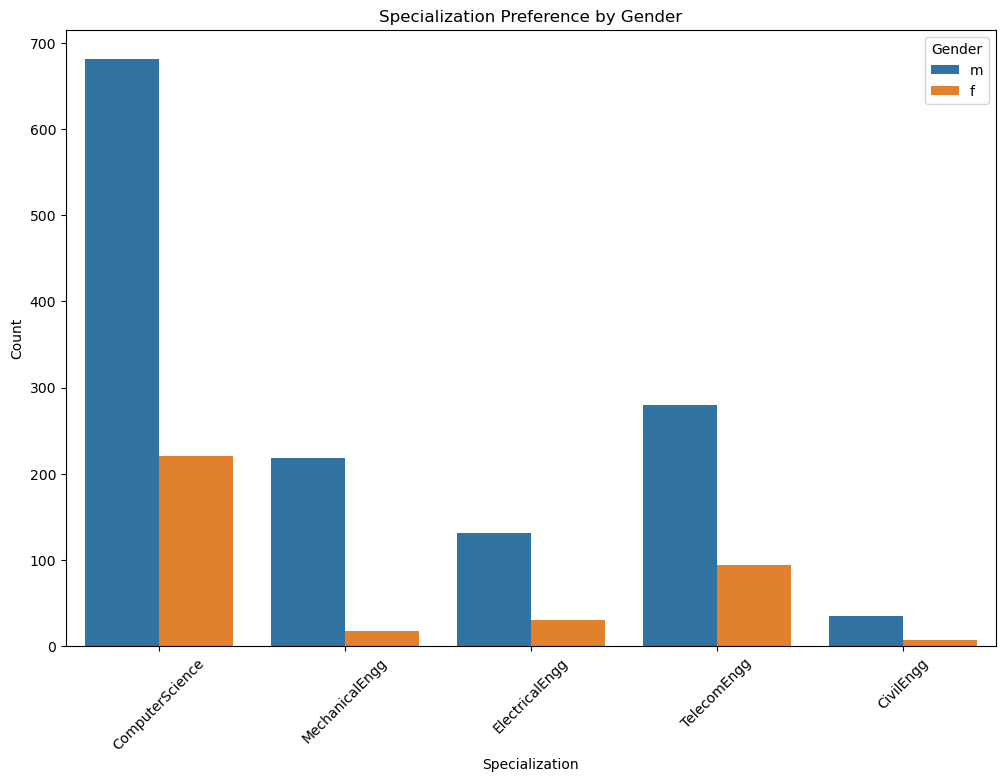

In [3]:
# Here I am assuming a non-negative value in the specialization columns as an indicator of choosing that field.

# Extract the specialization columns
specializations = ['ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg', 'CivilEngg']

specialization_data = data.melt(id_vars=['Gender'], value_vars=specializations, var_name='Specialization', value_name='Value')

# Filtering only those rows where the student has a positive value (indicating a choice in that field)
specialization_data = specialization_data[specialization_data['Value'] >= 0]

# Count plot for gender and specialization
plt.figure(figsize=(12,8))
sns.countplot(x='Specialization', hue='Gender', data=specialization_data)
plt.title('Specialization Preference by Gender')
plt.xlabel('Specialization')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

### Insights:

#### The chi-square test produced a p-value smaller than 0.05, indicating a significant relationship between gender and specialization. This suggests that gender does influence the choice of specialization. For instance, some specializations have a higher representation of males, while others (such as Biotechnology) show a higher representation of females.